In [70]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
#filtered_cnts = cnts[(cnts['RNA-control.bam'] >= 15) & (cnts['RNA-siLin28a.bam'] >= 15)& (cnts['RNA-siLuc.bam'] >= 15) & (cnts['RPF-siLin28a.bam'] >= 1)& (cnts['RPF-siLuc.bam'] >= 1)] 

In [71]:
READCOUNT_CUTOFF = 15
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
#filtered_cnts = cnts[(cnts['RNA-control.bam'] >= 15) & (cnts['RNA-siLin28a.bam'] >= 15)& (cnts['RNA-siLuc.bam'] >= 15) & (cnts['RPF-siLin28a.bam'] >= 1)& (cnts['RPF-siLuc.bam'] >= 1)] 
cnts = cnts[[col for col in cnts.columns if col.endswith('.bam')]].fillna(0)
cnts = cnts[(cnts > READCOUNT_CUTOFF).all(axis=1)].copy()
cnts

,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,
ENSMUSG00000103922.2,183,95,93,100,42,75
ENSMUSG00000033845.14,4014,1355,3022,2563,1859,3191
ENSMUSG00000025903.15,2045,574,1219,1236,33,44
ENSMUSG00000033813.16,1658,762,2130,2225,328,609
ENSMUSG00000033793.13,1111,474,1260,1031,603,1128
...,...,...,...,...,...,...
ENSMUSG00000064367.1,3665,5281,15549,17408,5986,5305
ENSMUSG00000064368.1,1666,1976,6741,8052,11471,10842
ENSMUSG00000064369.1,81,61,30,25,18,19


In [72]:
MILLION = 1e6
rpm = cnts / cnts.sum(axis=0) * MILLION
rpm

,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,
ENSMUSG00000103922.2,13.953400,19.523343,7.733823,10.523090,4.060447,5.995377
ENSMUSG00000033845.14,306.059824,278.464520,251.307661,269.706801,179.723114,255.083321
ENSMUSG00000025903.15,155.927340,117.962092,101.371290,130.065395,3.190351,3.517288
ENSMUSG00000033813.16,126.419330,156.597760,177.129489,234.138757,31.710157,48.682464
ENSMUSG00000033793.13,84.711626,97.411205,104.780825,108.493060,58.296416,90.170475
...,...,...,...,...,...,...
ENSMUSG00000064367.1,279.449242,1085.292347,1293.045273,1831.859539,578.710361,424.073023
ENSMUSG00000064368.1,127.029314,406.085529,560.577412,847.319222,1108.985392,866.691746
ENSMUSG00000064369.1,6.176095,12.536041,2.494782,2.630773,1.740192,1.518829


In [73]:
rpm['clip_enrichment'] = ((rpm['CLIP-35L33G.bam']) / (rpm['RNA-control.bam'])) 
rpm['rden_change'] = ((rpm['RPF-siLin28a.bam']) / (rpm['RNA-siLin28a.bam'])) / ((rpm['RPF-siLuc.bam']) / (rpm['RNA-siLuc.bam']))
rpm.head(100)

,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,
ENSMUSG00000103922.2,13.953400,19.523343,7.733823,10.523090,4.060447,5.995377,0.714703,0.921523
ENSMUSG00000033845.14,306.059824,278.464520,251.307661,269.706801,179.723114,255.083321,1.099098,0.756150
ENSMUSG00000025903.15,155.927340,117.962092,101.371290,130.065395,3.190351,3.517288,1.321843,1.163797
ENSMUSG00000033813.16,126.419330,156.597760,177.129489,234.138757,31.710157,48.682464,0.807287,0.861010
ENSMUSG00000033793.13,84.711626,97.411205,104.780825,108.493060,58.296416,90.170475,0.869629,0.669418
...,...,...,...,...,...,...,...,...
ENSMUSG00000060679.15,74.036893,115.084968,131.724465,152.795269,30.646706,48.442649,0.643324,0.733837
ENSMUSG00000070939.10,15.935850,31.853875,28.689988,19.362486,5.317252,4.476548,0.500280,0.801631
ENSMUSG00000010290.8,76.629328,66.995892,55.467310,71.557013,14.404919,16.467303,1.143791,1.128505


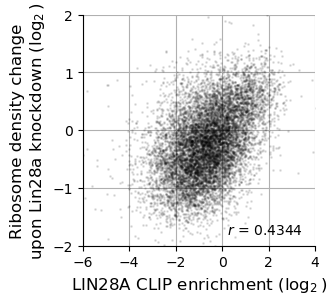

In [74]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stat


plt.style.use('default')

fig, ax = plt.subplots(figsize=(3, 3))
plt.xlim(-6, 4)
plt.ylim(-2, 2)
plt.yticks([-2, -1, 0, 1, 2])
ax.grid(zorder=1)
plt.xlabel(r"LIN28A CLIP enrichment ($\log_2$)", fontsize='large')
plt.ylabel("Ribosome density change\n" + r"upon Lin28a knockdown ($\log_2$)", fontsize='large')
r, p = stat.pearsonr(np.log2(rpm['clip_enrichment']), np.log2(rpm['rden_change']))
plt.annotate(rf'$r$ = {r:.4f}'.format(r), xy=(0.95, 0.05), xycoords='axes fraction', ha='right')
ax.scatter(np.log2(rpm['clip_enrichment']), np.log2(rpm['rden_change']), c='black', s=1, alpha=.1, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

Protein Localization 반영하기

In [76]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [78]:
gene_to_local = mouselocal.set_index('gene_id')['type'].to_dict()

rpm['gene_id'] = rpm.index.to_series().str.split('.').str[0]
rpm['local'] = rpm['gene_id'].map(gene_to_local)

local_to_color = {'nucleus': 'red', 'integral membrane': 'green', 'cytoplasm': 'blue'}
rpm['color'] = rpm['local'].map(local_to_color)
rpm = rpm.fillna('black')
rpm

,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,local,color
Geneid,,,,,,,,,,,
ENSMUSG00000103922.2,13.953400,19.523343,7.733823,10.523090,4.060447,5.995377,0.714703,0.921523,ENSMUSG00000103922,black,black
ENSMUSG00000033845.14,306.059824,278.464520,251.307661,269.706801,179.723114,255.083321,1.099098,0.756150,ENSMUSG00000033845,black,black
ENSMUSG00000025903.15,155.927340,117.962092,101.371290,130.065395,3.190351,3.517288,1.321843,1.163797,ENSMUSG00000025903,cytoplasm,blue
ENSMUSG00000033813.16,126.419330,156.597760,177.129489,234.138757,31.710157,48.682464,0.807287,0.861010,ENSMUSG00000033813,black,black
ENSMUSG00000033793.13,84.711626,97.411205,104.780825,108.493060,58.296416,90.170475,0.869629,0.669418,ENSMUSG00000033793,black,black
...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,279.449242,1085.292347,1293.045273,1831.859539,578.710361,424.073023,0.257488,1.933299,ENSMUSG00000064367,integral membrane,green
ENSMUSG00000064368.1,127.029314,406.085529,560.577412,847.319222,1108.985392,866.691746,0.312814,1.934072,ENSMUSG00000064368,integral membrane,green
ENSMUSG00000064369.1,6.176095,12.536041,2.494782,2.630773,1.740192,1.518829,0.492667,1.208200,ENSMUSG00000064369,black,black


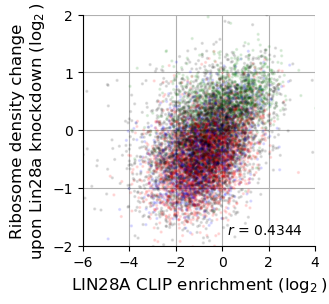

In [81]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stat


plt.style.use('default')

fig, ax = plt.subplots(figsize=(3, 3))
plt.xlim(-6, 4)
plt.ylim(-2, 2)
plt.yticks([-2, -1, 0, 1, 2])
ax.grid(zorder=1)
plt.xlabel(r"LIN28A CLIP enrichment ($\log_2$)", fontsize='large')
plt.ylabel("Ribosome density change\n" + r"upon Lin28a knockdown ($\log_2$)", fontsize='large')
r, p = stat.pearsonr(np.log2(rpm['clip_enrichment']), np.log2(rpm['rden_change']))
plt.annotate(rf'$r$ = {r:.4f}'.format(r), xy=(0.95, 0.05), xycoords='axes fraction', ha='right')
ax.scatter(np.log2(rpm['clip_enrichment']), np.log2(rpm['rden_change']), c=rpm['color'], s=2, alpha=.1, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)